In [4]:
from mmdet.apis import init_detector, inference_detector
from mmdet.utils import register_all_modules
from mmdet.registry import VISUALIZERS
import mmcv

In [5]:
# download the checkpoint demo
!mim download mmdet --config yolov3_mobilenetv2_8xb24-320-300e_coco --dest ./checkpoints
config_file = './checkpoints/yolov3_mobilenetv2_8xb24-320-300e_coco.py'
checkpoint_file = './checkpoints/yolov3_mobilenetv2_320_300e_coco_20210719_215349-d18dff72.pth'

/home/sanbu/anaconda3/envs/mmlab2/lib/python3.7/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
processing yolov3_mobilenetv2_8xb24-320-300e_coco...
yolov3_mobilenetv2_320_300e_coco_20210719_215349-d18dff72.pth exists in /home/sanbu/mmdetection/demo/checkpoints
Successfully dumped yolov3_mobilenetv2_8xb24-320-300e_coco.py to /home/sanbu/mmdetection/demo/checkpoints


In [6]:
#Register all modules in mmdet into the registries
register_all_modules()
# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cpu')  # or device='cuda:0'

local loads checkpoint from path: ./checkpoints/yolov3_mobilenetv2_320_300e_coco_20210719_215349-d18dff72.pth


In [7]:
# test a single image
img = mmcv.imread( 'demo.jpg', channel_order='rgb')
result = inference_detector(model, img)
print(result)

<DetDataSample(

    META INFORMATION
    ori_shape: (427, 640)
    batch_input_shape: (224, 320)
    pad_shape: (224, 320)
    img_id: 0
    img_shape: (214, 320)
    img_path: None
    scale_factor: (0.5, 0.5011709601873536)

    DATA FIELDS
    ignored_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
        ) at 0x7fd5789efed0>
    _gt_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
        ) at 0x7fd57d8d0c50>
    gt_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
        ) at 0x7fd57d8d0c50>
    _pred_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            bboxes: tensor([[224.3877, 181.1924, 454.1928, 374.6344],
                        [483.0889, 108.0703, 519.9299, 127.5264],
                        [407.6640, 113.0755, 436.7201, 130.1972],
                        [287.6279, 115.312

In [8]:
# init the visualizer(execute this block only once)
visualizer = VISUALIZERS.build(model.cfg.visualizer)
# the dataset_meta is loaded from the checkpoint and
# then pass to the model in init_detector
visualizer.dataset_meta = model.dataset_meta

/home/sanbu/anaconda3/envs/mmlab2/lib/python3.7/site-packages/mmengine/visualization/visualizer.py:170: UserWarning: `Visualizer` backend is not initialized because save_dir is None.
  warnings.warn('`Visualizer` backend is not initialized '


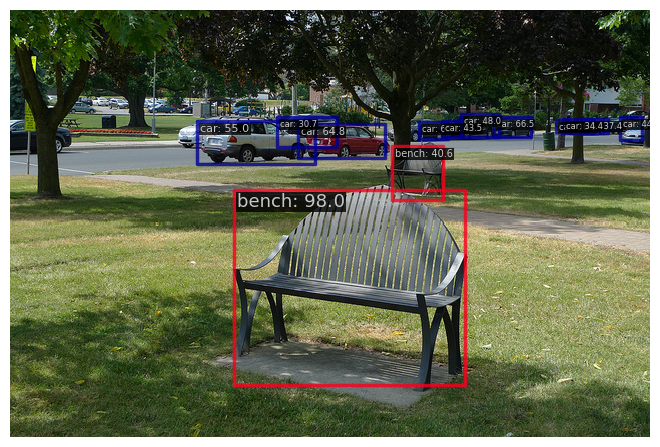

In [10]:
# show the results
visualizer.add_datasample(
    'result',
    img,
    data_sample=result,
    draw_gt=False,
    wait_time=0,
)
visualizer.show()